In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models,layers

## Data preprocessing

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
df = tf.keras.preprocessing.image_dataset_from_directory('PlantVillage', shuffle = True,
                                                         image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(df)

68

In [6]:
for image_batch, label_batch in df.take(1):
    print(image_batch[1].shape)

(256, 256, 3)


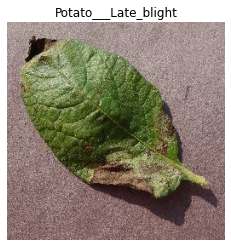

In [7]:
for image_batch, label_batch in df.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

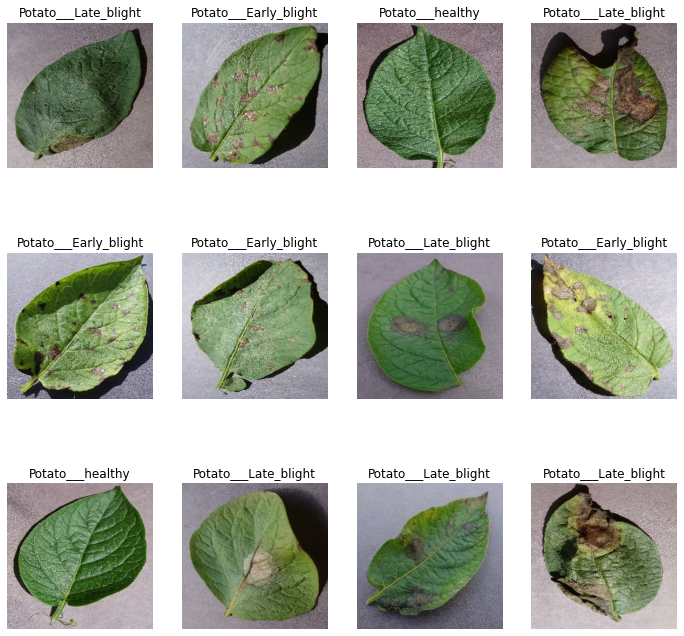

In [8]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
train = df.take(54)
len(train)

54

In [10]:
test = df.skip(54)
len(test)

14

In [11]:
val = test.take(6)
len(val)

6

In [12]:
test = test.skip(6)

In [13]:
len(test)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split =0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train, val, test = get_dataset_partitions_tf(df)

In [16]:
len(train), len(val), len(test)

(54, 6, 8)

In [17]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(train, batch_size = BATCH_SIZE, validation_data = val, verbose=1, epochs=50)

Epoch 1/50
54/54 [==============================] - 170s 3s/step - loss: 0.8876 - accuracy: 0.5087 - val_loss: 0.8200 - val_accuracy: 0.5353
Epoch 2/50
54/54 [==============================] - 203s 4s/step - loss: 0.6752 - accuracy: 0.6661 - val_loss: 0.5052 - val_accuracy: 0.7477
Epoch 3/50
54/54 [==============================] - 171s 3s/step - loss: 0.4715 - accuracy: 0.7882 - val_loss: 0.3432 - val_accuracy: 0.8582
Epoch 4/50
54/54 [==============================] - 145s 3s/step - loss: 0.3438 - accuracy: 0.8472 - val_loss: 0.4173 - val_accuracy: 0.8397
Epoch 5/50
54/54 [==============================] - 154s 3s/step - loss: 0.3144 - accuracy: 0.8715 - val_loss: 0.2550 - val_accuracy: 0.9016
Epoch 6/50
54/54 [==============================] - 143s 3s/step - loss: 0.2406 - accuracy: 0.9045 - val_loss: 0.1745 - val_accuracy: 0.9306
Epoch 7/50
54/54 [==============================] - 142s 3s/step - loss: 0.2298 - accuracy: 0.9080 - val_loss: 0.2989 - val_accuracy: 0.8709
Epoch 8/50
54

In [24]:
scores = model.evaluate(test)
scores

54/54 [==============================] - 22s 410ms/step - loss: 7.2828e-06 - accuracy: 1.0000


[7.282829756150022e-06, 1.0]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

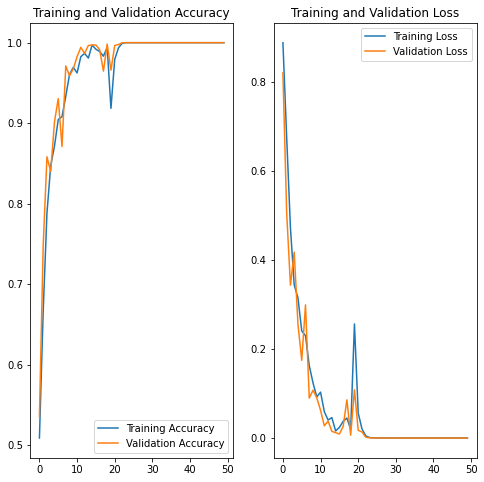

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 5s 5s/step
predicted label: Potato___Early_blight


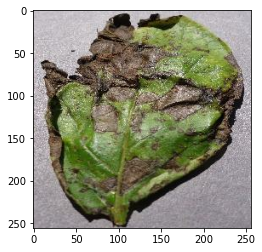

In [27]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 51ms/step


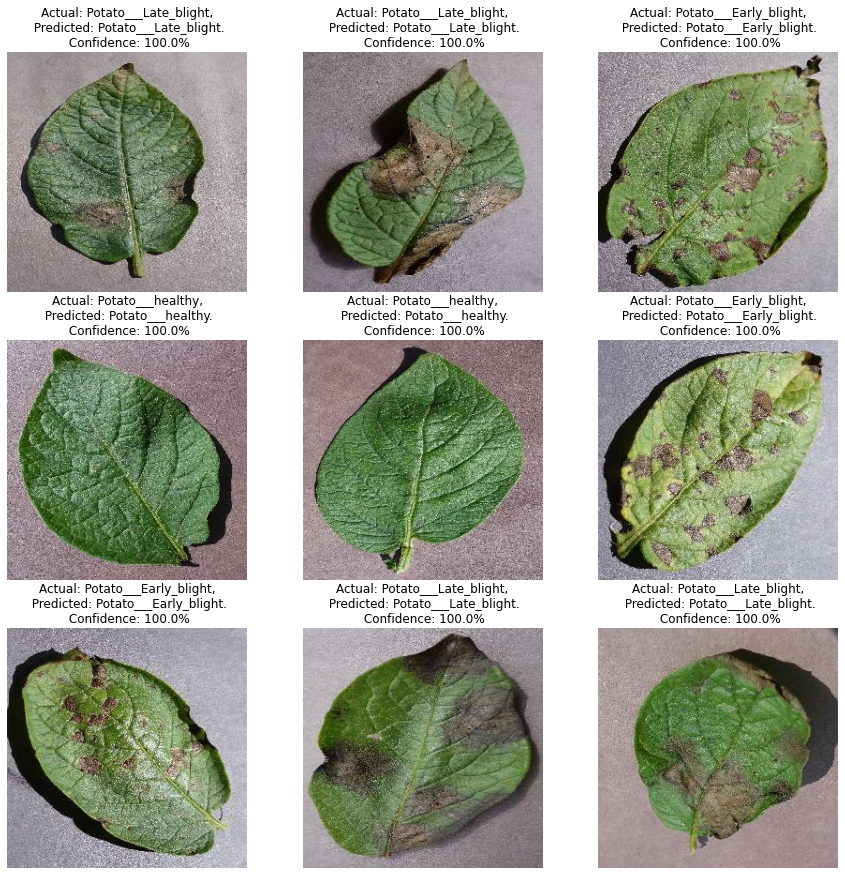

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [53]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
